In [1]:
#Подключаем библиотеки
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras import datasets, layers, models, utils, applications
import matplotlib.pyplot as plt

In [2]:
#Загружаем датасет
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
num_classes = 10
#Приводим данные к определенной форме для VGG-16, т.к. VGG-16 принимает на вход изображения (64, 64, 3)
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)
X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test]*3)
X_train = X_train.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64, 64))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64, 64))) for im in X_test])
print('Форма X_train :', X_train.shape)
print('Форма X_test :', X_test.shape)

Форма X_train : (60000, 64, 64, 3)
Форма X_test : (10000, 64, 64, 3)


In [3]:
#Переводим labels(метки) Y_train и Y_test из цифр от 0 до 9 в вектора из 10 элементов
print('До перевода:', Y_train[0])
Y_train = utils.to_categorical(Y_train, num_classes)
Y_test = utils.to_categorical(Y_test, num_classes)
print('После перевода', Y_train[0])

До перевода: 5
После перевода [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
'''Делим X_train и X_test на 255, чтобы привести все значения к промежутку от 0 до 1,
т.к. это np.array 4-х мерный массив, в котором хранятся значения 
пикселей(значения от 0 до 255)'''
X_train = X_train / 255.0
X_test = X_test / 255.0

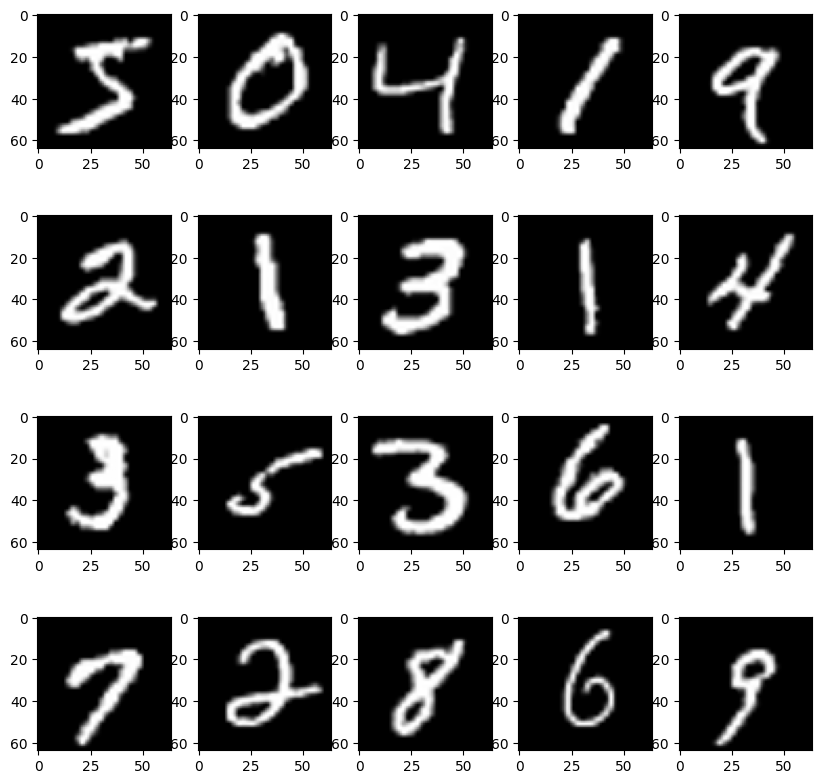

In [5]:
#Отрисовка первых 20 изображений из X_train
plt.figure(figsize =(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i])

In [6]:
#Создаем модель сверточной нейронной сети
HIDDEN = 64
EPOCHS = 5
BATCH_SIZE = 128
DROPOUT = 0.2
VALIDATION_SPLIT = 0.2

model = models.Sequential()
#Добавляем слой VGG-16 без полносвязанного слоя, т.к. input_shape не равен (224, 224, 3)
model.add(applications.VGG16(include_top = False, weights = "imagenet", input_shape = (64, 64, 3)))
#Приведем карты признаков(тензор) в вектор 
model.add(layers.Flatten())
#Добавляем обычный слой Dense и слой Dropout(для предотвращения переобучения)
model.add(layers.Dense(HIDDEN, activation ='relu'))
model.add(layers.Dropout(DROPOUT))
model.add(layers.Dense(num_classes, activation ='softmax'))
#Выводим краткую информацию про модель
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,846,474
Trainable params: 14,846,474
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Настраивакм модель с оптимизатором Adam, функцией потерь категориальная кроссэнтропия и метрикой точности
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Обучаем, задаем входные данные, батч, кол-во эпох и размер выборки валидации
history = model.fit(X_train , Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/5
375/375 [==============================] - 84s 171ms/step - loss: 0.8432 - accuracy: 0.7056 - val_loss: 0.1191 - val_accuracy: 0.9686
Epoch 2/5
375/375 [==============================] - 57s 152ms/step - loss: 0.1063 - accuracy: 0.9720 - val_loss: 0.0755 - val_accuracy: 0.9796
Epoch 3/5
375/375 [==============================] - 57s 151ms/step - loss: 0.0699 - accuracy: 0.9811 - val_loss: 0.0525 - val_accuracy: 0.9867
Epoch 4/5
375/375 [==============================] - 56s 149ms/step - loss: 0.0532 - accuracy: 0.9861 - val_loss: 0.0517 - val_accuracy: 0.9865
Epoch 5/5
375/375 [==============================] - 57s 152ms/step - loss: 0.0476 - accuracy: 0.9877 - val_loss: 0.0433 - val_accuracy: 0.9894


In [10]:
#Делаем проверку на тесте
score = model.evaluate(X_test, Y_test)
print("Значение потерь(LOSS): ", score[0])
print("Значение точности(ACCURACY): ", score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.0389 - accuracy: 0.9895
Значение потерь(LOSS):  0.03886327147483826
Значение точности(ACCURACY):  0.9894999861717224


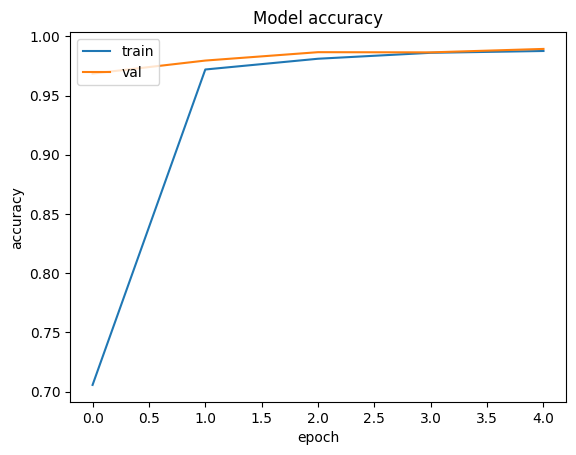

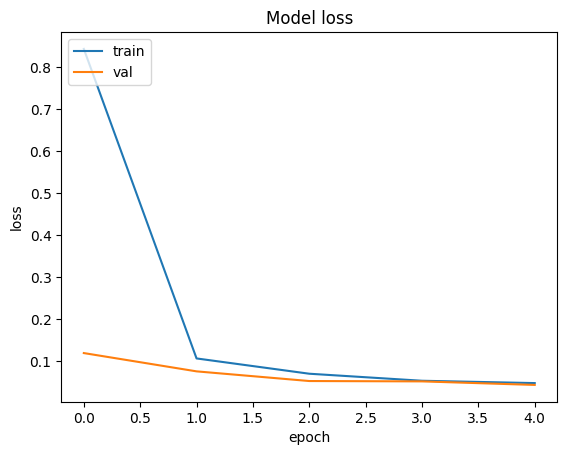

In [11]:
#Изобразим график точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Изобразим график потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Вывод: В результате обучения двух нейронныйх сетей на датасете MNIST(написанной при помощи обычных слоев Conv2D, MaxPooling2D и при помощи предобученной нейронной сети VGG-16), можно заметить, что нейронная сеть с VGG-16 выдает чуть большую точность. Если рассматривать графики, то можно заметить, что нейронная сеть с VGG-16 более резкий прирост в точности. Для большой наглядности в первой части работы, продемонстрированы карты признаков на разных слоях свертки. 

Примечание: При попытке преобразовать изображения из дататсета MNIST к RGB виду (224, 224, 3) из вида (28, 28, 1), т.е. надо было сделать resize, но на этом моменте ОЗУ умирало. Проблемы с переводом в RGB не было. Пробовал сделать это так:
```
new_img = np.array(X_train)

X_train = tf.data.Dataset.from_tensor_slices(X_train).\
    map(lambda x: tf.resize(x / 255, (224, 224)))

print(next(iter(X_train)))
```
Минус тут был в том что на выходе X_train был типа MapDataset, который я не смог преобразовать в numpy.ndarray, но данный способ очень эффективно использовал ОЗУ. Поэтому я просто немного увеличил картинку в размере. Думал еще, что аппаратный ускоритель GPU или TPU, решат эту проблему, но нет(.


Ссылка: [Первая часть работы](https://colab.research.google.com/drive/1Jed7xwLCHSo7sWni0CjISsGyFLTui87z?usp=sharing)